In [2]:
DATA_PATH = 'C:\\Users\\tomte\\SGDatavers\\football_euro\\'
RANKING_PATH = f'{DATA_PATH}fifa_ranking-2023-07-20.csv'
MATCH_PATH = f'{DATA_PATH}international_matches.csv'
RESULT_PATH = f'{DATA_PATH}results.csv'

In [3]:
import numpy as np
import pandas as pd 
import datetime as dt
from urllib.request import urlopen
from bs4 import BeautifulSoup
from collections import defaultdict
import matplotlib.pyplot as plt

### 0) Read Data

In [4]:
ranking_data = pd.read_csv(RANKING_PATH, parse_dates=["rank_date"], index_col="rank_date")
match_data = pd.read_csv(MATCH_PATH)
result_data = pd.read_csv(RESULT_PATH)

In [5]:
ranking_data.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
rank_date,,,,,,,
1992-12-31,1,Germany,GER,57.0,0.0,0,UEFA
1992-12-31,96,Syria,SYR,11.0,0.0,0,AFC
1992-12-31,97,Burkina Faso,BFA,11.0,0.0,0,CAF


In [6]:
match_data.head(3)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
result_data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [8]:
match_data = match_data.replace({'Germany DR': 'Germany', 'China': 'China PR'})
match_data['date'] = pd.to_datetime(match_data['date'])

### 1) Filter Data by Euro

In [9]:
ranking_uefa = ranking_data[ranking_data['confederation'] == 'UEFA']

In [10]:
european_countries: list = list(ranking_uefa['country_full'].unique())

In [11]:
home_team_mask = match_data['home_team_continent'] == 'Europe'
away_team_mask = match_data['away_team_continent'] == 'Europe'

In [12]:
team_masks = np.logical_and.reduce([home_team_mask, away_team_mask])

In [13]:
match_europe = match_data[team_masks] 

In [14]:
match_europe.head(3)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1993-08-22,Sweden,France,Europe,Europe,4,12,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
home_country_mask = result_data['home_team'].isin(european_countries)
away_country_mask = result_data['away_team'].isin(european_countries)

In [16]:
country_masks = np.logical_and.reduce([home_country_mask, away_country_mask])

In [17]:
result_europe = result_data[country_masks] 

In [18]:
result_europe.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [19]:
result_europe

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
46136,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False
46137,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False
46138,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False
46139,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


### 3) Analysis

In [21]:
#ranking_uefa['rank_date'] = pd.to_datetime(ranking_uefa['rank_date'])

In [22]:
#year = 2021
#mask = ranking_uefa['rank_date'].dt.year == int(year)
#ranking_year = ranking_uefa[mask]

In [23]:
#ranking_year.sort_values(by=['rank'])

### 3) Webscrapping

In [24]:
#Scraps data from webpage
def get_group_matches():
    url = "https://en.wikipedia.org/wiki/UEFA_Euro_2024"
    html = urlopen(url).read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    wikitables = soup.find_all("table", class_="fevent")

    group_dict = defaultdict(list)
    g_names = ['A', 'B', 'C', 'D', 'E', 'F']
    counter = 0
    nMATCHES_IN_GROUPS = 6

    for wikitable in wikitables:
        # Check if the current table matches the specified structure
        if wikitable.find("th", class_="fhome", itemprop="homeTeam", text="Runner-up Group A"):
            break  # Break out of the loop if the specified table structure is found

        matches = wikitable.find_all('tr', itemprop="name")

        for match in matches:
            home_team_element = match.find("th", class_="fhome")
            away_team_element = match.find("th", class_="faway")

            if home_team_element and away_team_element:
                home_team_span = home_team_element.find("span", itemprop="name")
                away_team_span = away_team_element.find("span", itemprop="name")

                if home_team_span and away_team_span:
                    home_team = home_team_span.text.strip()
                    away_team = away_team_span.text.strip()

                    # Update counter if the current group reaches the max number of matches
                    if len(group_dict[g_names[counter]]) == nMATCHES_IN_GROUPS:
                        counter += 1
                        # Check if counter exceeds the length of group names list
                        if counter >= len(g_names):
                            break  

                    group_dict[g_names[counter]].append((home_team, away_team))

    return dict(group_dict)

# Converts scrapped data into dataframe
def create_group_df():
    rows = []
    group_dict = get_group_matches()
    for groups, matches in group_dict.items():
        for home,away in matches:
            rows.append([groups, home, away, 0, 0])
    game_results_df = pd.DataFrame(rows, columns=['Group', 'HomeTeam', 'AwayTeam', 'tot_group_points_Home', 'tot_group_points_Away'])
    return game_results_df

In [25]:
eu_groups = create_group_df()

C:\Users\tomte\AppData\Local\Temp\ipykernel_2584\313934264.py:15: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if wikitable.find("th", class_="fhome", itemprop="homeTeam", text="Runner-up Group A"):


In [26]:
eu_groups.head()

,Group,HomeTeam,AwayTeam,tot_group_points_Home,tot_group_points_Away
0,A,Germany,Scotland,0,0
1,A,Hungary,Switzerland,0,0
2,A,Germany,Hungary,0,0
3,A,Scotland,Switzerland,0,0
4,A,Switzerland,Germany,0,0


In [28]:
eu_groups.to_csv('europe_groups.csv', index = False)

In [29]:
ranking_data = ranking_data.groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

C:\Users\tomte\AppData\Local\Temp\ipykernel_2584\4001092292.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ranking_data = ranking_data.groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


In [31]:
ranking_data

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2003-01-15,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
1,2003-01-16,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
2,2003-01-17,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
3,2003-01-18,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
4,2003-01-19,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
...,...,...,...,...,...,...,...,...
2249908,2023-07-16,124.0,Zimbabwe,ZIM,1138.56,1138.56,-2.0,CAF
2249909,2023-07-17,124.0,Zimbabwe,ZIM,1138.56,1138.56,-2.0,CAF
2249910,2023-07-18,124.0,Zimbabwe,ZIM,1138.56,1138.56,-2.0,CAF
2249911,2023-07-19,124.0,Zimbabwe,ZIM,1138.56,1138.56,-2.0,CAF


In [32]:
match_data = match_data.merge(ranking_data,
                        left_on=['date', 'home_team'],
                        right_on=['rank_date', 'country_full'])
match_data = match_data.merge(ranking_data,
                        left_on=['date', 'away_team'],
                        right_on=['rank_date', 'country_full'],
                        suffixes=('_home', '_away'))

In [33]:
match_data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,-28.0,CONMEBOL,1993-08-08,22.0,Uruguay,URU,46.0,48.0,6.0,CONMEBOL
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,5.0,CONMEBOL,1993-08-08,14.0,Mexico,MEX,50.0,43.0,-11.0,CONCACAF
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,-30.0,CONMEBOL,1993-08-08,94.0,Venezuela,VEN,14.0,5.0,-31.0,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,2.0,CAF,1993-08-08,86.0,Sierra Leone,SLE,18.0,16.0,7.0,CAF
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,-1.0,CONMEBOL,1993-08-08,5.0,Argentina,ARG,56.0,51.0,-5.0,CONMEBOL


In [34]:
match_data = match_data.dropna(how="all")

In [35]:
match_data.shape

(23522, 41)

### Feature Engineering

In [36]:
# Convert columns to numerical data types if necessary
match_data['home_team_fifa_rank'] = pd.to_numeric(match_data['home_team_fifa_rank'], errors='coerce')
match_data['away_team_fifa_rank'] = pd.to_numeric(match_data['away_team_fifa_rank'], errors='coerce')
match_data['home_team_total_fifa_points'] = pd.to_numeric(match_data['home_team_total_fifa_points'], errors='coerce')
match_data['away_team_total_fifa_points'] = pd.to_numeric(match_data['away_team_total_fifa_points'], errors='coerce')
match_data['home_team_score'] = pd.to_numeric(match_data['home_team_score'], errors='coerce')
match_data['away_team_score'] = pd.to_numeric(match_data['away_team_score'], errors='coerce')

# Useful variables
match_data['Rank_difference'] = match_data['home_team_fifa_rank'] - match_data['away_team_fifa_rank']
match_data['AVG_difference'] = (match_data['home_team_fifa_rank'] + match_data['away_team_fifa_rank']) / 2
match_data['points_difference'] = match_data['home_team_total_fifa_points'] - match_data['away_team_total_fifa_points']
match_data['score_difference'] = match_data['home_team_score'] - match_data['away_team_score']
match_data['is_won'] = match_data['score_difference'] > 0  # take draw as lost
match_data['is_stake'] = match_data['tournament'] != 'Friendly'

max_rest = 30
match_data['rest_days'] = match_data.groupby('home_team')['date'].diff().dt.days.clip(0, max_rest).fillna(max_rest)

#All countries participating in euro 2024
euro_countries = set(eu_groups['HomeTeam'])

match_data['euro_participant'] = match_data['home_team'].isin(euro_countries)

# One-hot encode the euro_participant column with specified suffix
one_hot_encoded = pd.get_dummies(match_data['euro_participant']).add_suffix('_euro')
match_data = match_data.join(one_hot_encoded)

In [37]:
COLUMNS = ['home_team', 'away_team', 'Rank_difference', 'AVG_difference', 'points_difference', 'score_difference',
           'rest_days', 'euro_participant', 'is_won', 'is_stake']
model_df = match_data[COLUMNS]

In [38]:
na_counts = match_data.isna().sum()
columns_to_drop = na_counts[na_counts > 5000].index.tolist()
match_data = match_data.drop(columns=columns_to_drop)
match_data.isna().sum()

date                           0
home_team                      0
away_team                      0
home_team_continent            0
away_team_continent            0
home_team_fifa_rank            0
away_team_fifa_rank            0
home_team_total_fifa_points    0
away_team_total_fifa_points    0
home_team_score                0
away_team_score                0
tournament                     0
city                           0
country                        0
neutral_location               0
shoot_out                      0
home_team_result               0
rank_date_home                 0
rank_home                      0
country_full_home              0
country_abrv_home              0
total_points_home              0
previous_points_home           0
rank_change_home               0
confederation_home             0
rank_date_away                 0
rank_away                      0
country_full_away              0
country_abrv_away              0
total_points_away              0
previous_p

### Model Training

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are defined as in the provided data
X, y = match_data.loc[:, ['AVG_difference', 'Rank_difference', 'points_difference', 'is_stake']], match_data['is_won']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(C=1e-5)
logreg.fit(X_train, y_train)

# Train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train gradient boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Train support vector machine model
svm = SVC(kernel='rbf', gamma='auto', random_state=42)
svm.fit(X_train, y_train)

# Train k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'Gradient Boosting': gb,
          'Support Vector Machine': svm, 'K-Nearest Neighbors': knn, 'Neural Network': mlp}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.6774
Random Forest Accuracy: 0.6400
Gradient Boosting Accuracy: 0.6786
Support Vector Machine Accuracy: 0.6106
K-Nearest Neighbors Accuracy: 0.6380
Neural Network Accuracy: 0.6780


### Evaluation

Logistic Regression Accuracy: 0.6774


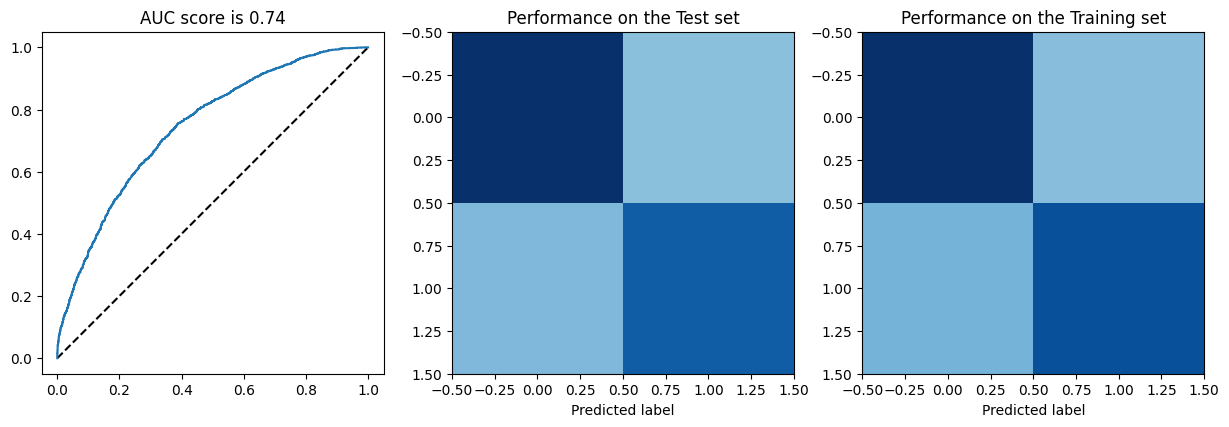

Random Forest Accuracy: 0.6400


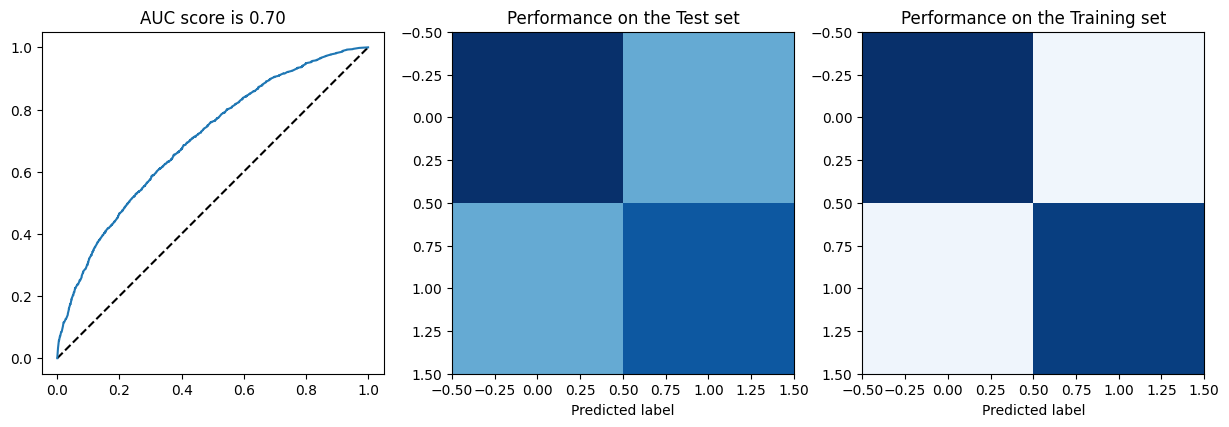

Gradient Boosting Accuracy: 0.6786


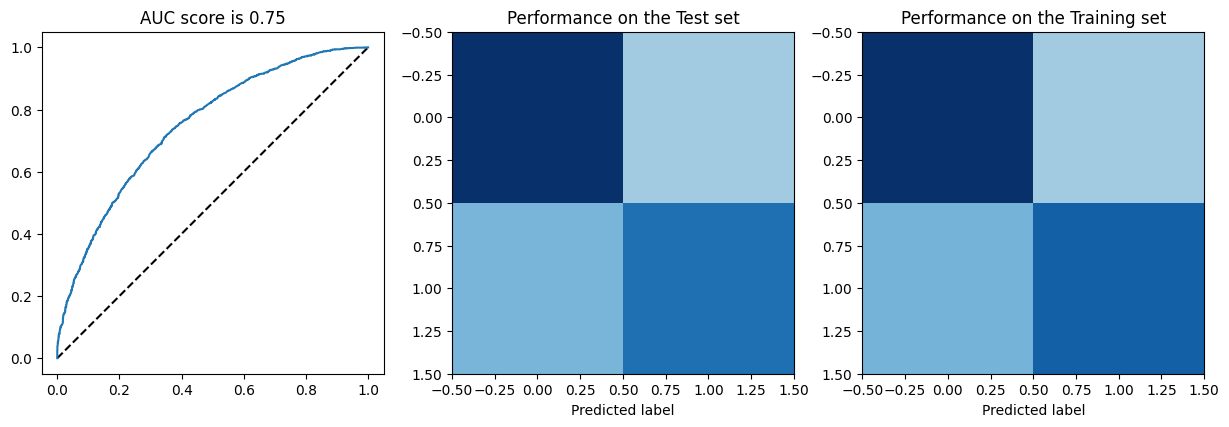

K-Nearest Neighbors Accuracy: 0.6380


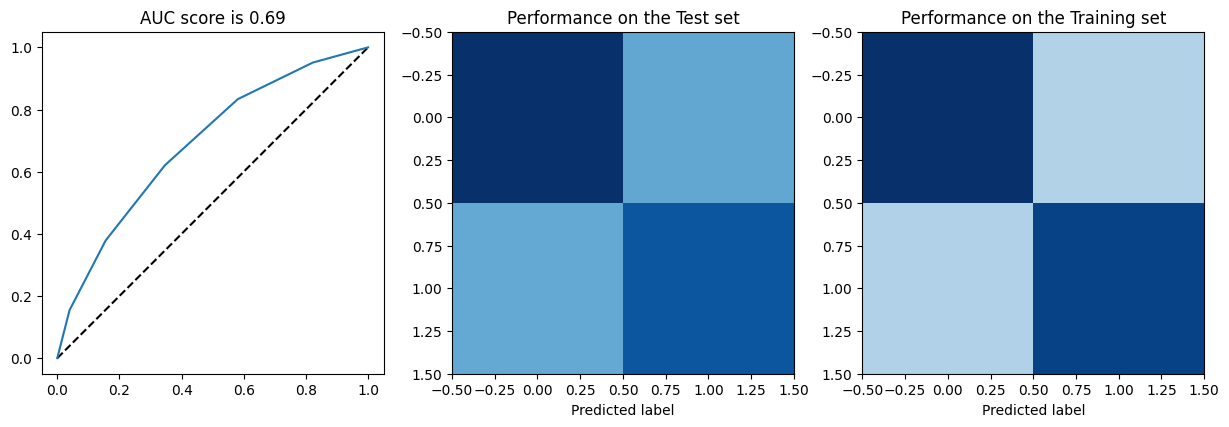

Neural Network Accuracy: 0.6780


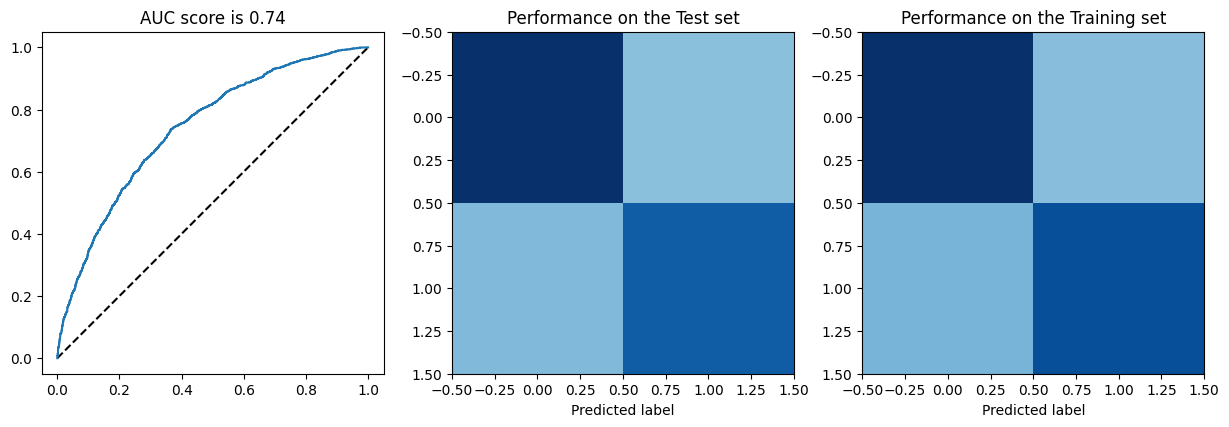

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Define a function to plot ROC curve and confusion matrix
def plot_evaluation(model, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(15, 5))

    # Plot ROC curve
    ax = plt.subplot(1, 3, 1)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr)
    ax.set_title('AUC score is {0:0.2f}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])))
    ax.set_aspect(1)

    # Plot confusion matrix on the test set
    ax = plt.subplot(1, 3, 2)
    cm = confusion_matrix(y_test, model.predict(X_test))
    ax.imshow(cm, cmap='Blues', clim=(0, cm.max()))
    ax.set_xlabel('Predicted label')
    ax.set_title('Performance on the Test set')

    # Plot confusion matrix on the training set
    ax = plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_train, model.predict(X_train))
    ax.imshow(cm, cmap='Blues', clim=(0, cm.max()))
    ax.set_xlabel('Predicted label')
    ax.set_title('Performance on the Training set')

    plt.show()

# Evaluate models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'Gradient Boosting': gb,
           'K-Nearest Neighbors': knn, 'Neural Network': mlp}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

    # Plot ROC curve and confusion matrix
    plot_evaluation(model, X_test, y_test)

Stakes distribution in the wrong predictions
is_stake
True     0.597222
False    0.402778
Name: count, dtype: float64
Stakes distribution overall
is_stake
True     0.640889
False    0.359111
Name: count, dtype: float64


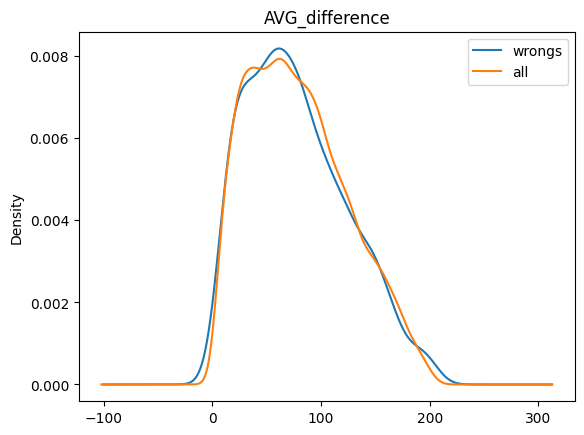

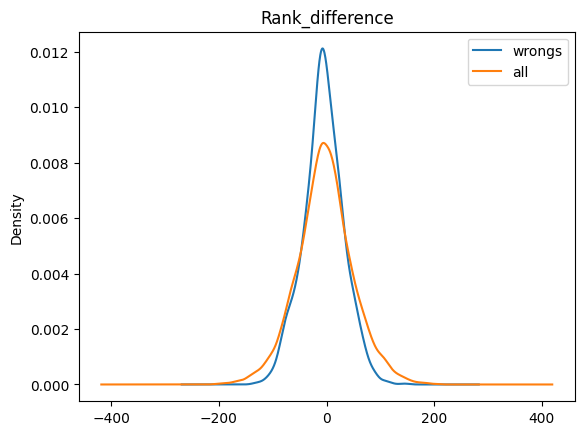

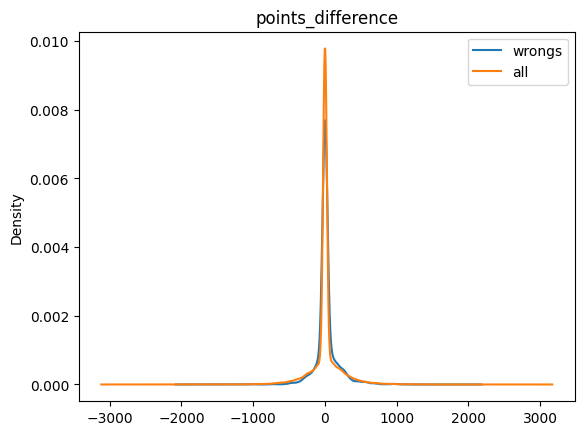

In [41]:
features = ['AVG_difference', 'Rank_difference', 'points_difference']
wrongs = y_test != gb.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])

print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

In [42]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [3, 5],
          "max_depth": [3, 5, 10],
          "max_features": ["sqrt"],
          "n_estimators": [100, 200]
          }

gb_cv = GridSearchCV(gb, params, cv=3, n_jobs=-1, verbose=True)
gb_cv.fit(X_train, y_train)

y_preds = gb_cv.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


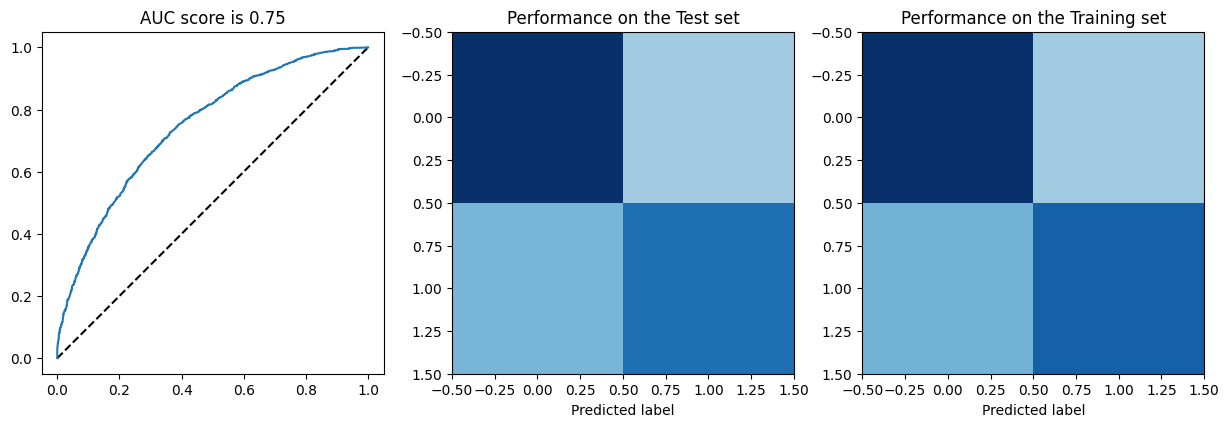

In [43]:
plot_evaluation(gb_cv,X_test,y_test)

### Filter for Euro Teams

In [44]:
margin = 0.05

world_ranking = ranking_data.loc[
    (ranking_data['rank_date'] == ranking_data['rank_date'].max()) ]
world_ranking = world_ranking.replace({"Türkiye":"Turkey","Czechia": "Czech Republic"})
world_ranking = world_ranking.set_index(['country_full'])

In [45]:
world_ranking['win_probabilty'] = 0.0
world_ranking['tot_points'] = 0

In [46]:
world_ranking.columns.values[0] = "country_full"

In [47]:
euro_df =  create_group_df()
euro_df

C:\Users\tomte\AppData\Local\Temp\ipykernel_2584\313934264.py:15: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if wikitable.find("th", class_="fhome", itemprop="homeTeam", text="Runner-up Group A"):


,Group,HomeTeam,AwayTeam,tot_group_points_Home,tot_group_points_Away
0,A,Germany,Scotland,0,0
1,A,Hungary,Switzerland,0,0
2,A,Germany,Hungary,0,0
3,A,Scotland,Switzerland,0,0
4,A,Switzerland,Germany,0,0
5,A,Scotland,Hungary,0,0
6,B,Spain,Croatia,0,0
7,B,Italy,Albania,0,0
8,B,Croatia,Albania,0,0
9,B,Spain,Italy,0,0


In [48]:
teamgroup = euro_df[['Group', 'HomeTeam']].drop_duplicates().reset_index(drop=True)
teamgroup['total_points'] = 0
teamgroup['win_prob'] = 0
teamgroup.set_index('HomeTeam', inplace=True)

In [49]:
team_stats = world_ranking.merge(euro_df, how='left', left_on='country_full', right_on='HomeTeam')

ValueError: 'country_full' is both an index level and a column label, which is ambiguous.

In [ ]:
team_stats.insert(0, "country_fulls", team_stats['HomeTeam'])
team_stats.drop_duplicates(subset=['country_fulls'], inplace=True)

### Predicting First matches 

In [53]:
euro_df

,Group,HomeTeam,AwayTeam,tot_group_points_Home,tot_group_points_Away
0,A,Germany,Scotland,0,0
1,A,Hungary,Switzerland,0,0
2,A,Germany,Hungary,0,0
3,A,Scotland,Switzerland,0,0
4,A,Switzerland,Germany,0,0
5,A,Scotland,Hungary,0,0
6,B,Spain,Croatia,0,0
7,B,Italy,Albania,0,0
8,B,Croatia,Albania,0,0
9,B,Spain,Italy,0,0


In [54]:
opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

list_result = []

for group in sorted(set(euro_df['Group'])):
    print("\n-------Starting group {}-------  \n".format(group))
    group_matches = euro_df[euro_df['Group'] == group]
    for idx, row in group_matches.iterrows():
        dict_rows = {}
        
        home = row["HomeTeam"]
        away = row["AwayTeam"]
        print(f"{home} VS {away} --- \t", end="")
    
        # Creating a row for prediction
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
    
        # Getting rank and points information
        home_rank = world_ranking.loc[home, 'rank']
        home_points = world_ranking.loc[home, 'total_points']
        opp_rank = world_ranking.loc[away, 'rank']
        opp_points = world_ranking.loc[away, 'total_points']
    
        # Adding features to the row
        row['AVG_difference'] = (home_rank + opp_rank) / 2
        row['Rank_difference'] = home_rank - opp_rank
        row['points_difference'] = home_points - opp_points
    
        # Predicting probabilities with the model
        home_win_prob1 = gb_cv.predict_proba(row)[:, 1][0]
    
        # Updating win probability and points in world_ranking DataFrame
        teamgroup.loc[home, 'win_prob'] += home_win_prob1
        teamgroup.loc[away, 'win_prob'] += 1 - home_win_prob1

        #print(f'home win prob : {home_win_prob1}')

        dict_rows['home'] = home
        dict_rows['away'] = away
        
        # Determining match outcome and updating points accordingly
        margin = 0.05
        if home_win_prob1 <= 0.5 - margin:
            print(f"{away} Wins with {1 - home_win_prob1:.2f}")
            teamgroup.loc[away, 'total_points'] += 3
            dict_rows['winner'] = away
            dict_rows['prob'] = 1 - home_win_prob1
        elif home_win_prob1 >= 0.5 + margin:
            print(f"{home} Wins with {home_win_prob1:.2f}")
            teamgroup.loc[home, 'total_points'] += 3
            dict_rows['winner'] = home
            dict_rows['prob'] = 1 - home_win_prob1
        else:
            print(f"{home} and {away} DRAWS!! {home_win_prob1:.2f}% to win for {home} & {1-home_win_prob1:.2f}% to win for {away}")
            teamgroup.loc[home, 'total_points'] += 1
            teamgroup.loc[away, 'total_points'] += 1
            dict_rows['winner'] = home
            dict_rows['prob'] = home_win_prob1

        list_result.append(dict_rows)


-------Starting group A-------  

Germany VS Scotland --- 	Germany Wins with 0.57
Hungary VS Switzerland --- 	Switzerland Wins with 0.71
Germany VS Hungary --- 	Germany Wins with 0.57
Scotland VS Switzerland --- 	Switzerland Wins with 0.75
Switzerland VS Germany --- 	Germany Wins with 0.56
Scotland VS Hungary --- 	Scotland and Hungary DRAWS!! 0.47% to win for Scotland & 0.53% to win for Hungary

-------Starting group B-------  

Spain VS Croatia --- 	Croatia Wins with 0.65
Italy VS Albania --- 	Italy Wins with 0.75
Croatia VS Albania --- 	Croatia Wins with 0.75
Spain VS Italy --- 	Italy Wins with 0.63
Albania VS Spain --- 	Spain Wins with 0.88
Croatia VS Italy --- 	Croatia and Italy DRAWS!! 0.45% to win for Croatia & 0.55% to win for Italy

-------Starting group C-------  

Slovenia VS Denmark --- 	Denmark Wins with 0.76
Serbia VS England --- 	England Wins with 0.74
Slovenia VS Serbia --- 	Serbia Wins with 0.75
Denmark VS England --- 	England Wins with 0.71
England VS Slovenia --- 	En

In [55]:
pd.DataFrame(list_result)

,home,away,winner,prob
0,Germany,Scotland,Germany,0.434215
1,Hungary,Switzerland,Switzerland,0.711921
2,Germany,Hungary,Germany,0.430173
3,Scotland,Switzerland,Switzerland,0.746550
4,Switzerland,Germany,Germany,0.559628
5,Scotland,Hungary,Scotland,0.467071
6,Spain,Croatia,Croatia,0.652245
7,Italy,Albania,Italy,0.248271
8,Croatia,Albania,Croatia,0.248271
9,Spain,Italy,Italy,0.630317
